In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [2]:
print(labels[1])

tensor(5)


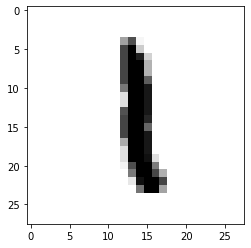

In [3]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

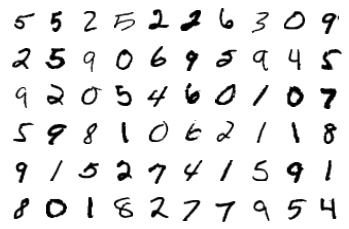

In [4]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [5]:
from torch import nn, optim

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [6]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [7]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)


Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002]])


In [8]:
from time import time

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6550518794974157
Epoch 1 - Training loss: 0.2830068259589326
Epoch 2 - Training loss: 0.22213704882860819
Epoch 3 - Training loss: 0.17797432971725077
Epoch 4 - Training loss: 0.1494797969153568
Epoch 5 - Training loss: 0.12737060404086767
Epoch 6 - Training loss: 0.11050341560690007
Epoch 7 - Training loss: 0.0992113391844941
Epoch 8 - Training loss: 0.08973371391214414
Epoch 9 - Training loss: 0.08126378828621925
Epoch 10 - Training loss: 0.07313163875381766
Epoch 11 - Training loss: 0.06604522677547515
Epoch 12 - Training loss: 0.060798318080627904
Epoch 13 - Training loss: 0.05642887769834891
Epoch 14 - Training loss: 0.052428776815807675

Training Time (in minutes) = 1.8812787691752115


Predicted Digit = 2
Original shape: torch.Size([1, 784])


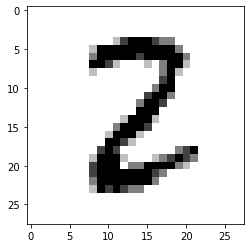

In [9]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
# Print out original shape and new shape
print(f"Original shape: {img.shape}")

In [10]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)


        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9758


In [47]:
torch.save(model, './my_mnist_model.pt') 

In [79]:
## load in custom image
import torchvision 

custom_image_path = "/Users/sierra/Downloads/five_real.png"

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")



Custom image tensor:
tensor([[[211, 212, 211,  ..., 197, 197, 195],
         [209, 211, 209,  ..., 195, 195, 195],
         [206, 208, 207,  ..., 192, 193, 193],
         ...,
         [198, 196, 198,  ..., 194, 194, 193],
         [198, 197, 199,  ..., 194, 193, 193],
         [196, 195, 196,  ..., 193, 193, 193]],

        [[208, 209, 208,  ..., 194, 194, 192],
         [206, 208, 206,  ..., 192, 192, 192],
         [203, 205, 204,  ..., 189, 190, 190],
         ...,
         [195, 193, 195,  ..., 192, 192, 192],
         [194, 193, 195,  ..., 192, 192, 192],
         [192, 191, 192,  ..., 192, 192, 192]],

        [[201, 202, 201,  ..., 186, 186, 185],
         [199, 201, 199,  ..., 184, 184, 185],
         [196, 198, 197,  ..., 181, 182, 183],
         ...,
         [189, 187, 189,  ..., 187, 187, 187],
         [191, 190, 192,  ..., 187, 188, 188],
         [189, 188, 189,  ..., 187, 188, 188]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 25

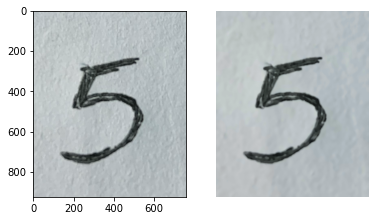

In [87]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(custom_image_path)
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.axis(False);
plt.show()

In [88]:

# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 
custom_image = np.abs(custom_image - 1)
#custom_image = np.round(custom_image)
# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.1725, 0.1686, 0.1725,  ..., 0.2275, 0.2275, 0.2353],
         [0.1804, 0.1725, 0.1804,  ..., 0.2353, 0.2353, 0.2353],
         [0.1922, 0.1843, 0.1882,  ..., 0.2471, 0.2431, 0.2431],
         ...,
         [0.2235, 0.2314, 0.2235,  ..., 0.2392, 0.2392, 0.2431],
         [0.2235, 0.2275, 0.2196,  ..., 0.2392, 0.2431, 0.2431],
         [0.2314, 0.2353, 0.2314,  ..., 0.2431, 0.2431, 0.2431]],

        [[0.1843, 0.1804, 0.1843,  ..., 0.2392, 0.2392, 0.2471],
         [0.1922, 0.1843, 0.1922,  ..., 0.2471, 0.2471, 0.2471],
         [0.2039, 0.1961, 0.2000,  ..., 0.2588, 0.2549, 0.2549],
         ...,
         [0.2353, 0.2431, 0.2353,  ..., 0.2471, 0.2471, 0.2471],
         [0.2392, 0.2431, 0.2353,  ..., 0.2471, 0.2471, 0.2471],
         [0.2471, 0.2510, 0.2471,  ..., 0.2471, 0.2471, 0.2471]],

        [[0.2118, 0.2078, 0.2118,  ..., 0.2706, 0.2706, 0.2745],
         [0.2196, 0.2118, 0.2196,  ..., 0.2784, 0.2784, 0.2745],
         [0.2314, 0.2235, 0.2275,  ..

In [89]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((28, 28)), #MNIST only provides 28
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([4, 924, 756])
New shape: torch.Size([4, 28, 28])


Predicted Digit = 5


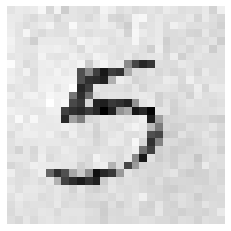

In [90]:
images, labels = next(iter(valloader))
img = custom_image_transformed[0].view(1, 784)

plt.imshow(custom_image_transformed[0].numpy().squeeze(), cmap='gray_r')
plt.axis(False);
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
